In [2]:
import pandas as pd

# Load the uploaded BTC 1H CSV file
file_path = '/home/int_junkie/Documents/Articles/DataVisuals/BTCUSD_H1.csv'
btc_data = pd.read_csv(file_path)

# Display basic information about the dataset
btc_data_info = btc_data.info()
btc_data_head = btc_data.head()

btc_data_info, btc_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 1 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   <DATE>	<TIME>	<OPEN>	<HIGH>	<LOW>	<CLOSE>	<TICKVOL>	<VOL>	<SPREAD>  2401 non-null   object
dtypes: object(1)
memory usage: 18.9+ KB


(None,
   <DATE>\t<TIME>\t<OPEN>\t<HIGH>\t<LOW>\t<CLOSE>\t<TICKVOL>\t<VOL>\t<SPREAD>
 0  2024.08.06\t00:00:00\t54367.74\t55182.84\t5423...                        
 1  2024.08.06\t01:00:00\t54342.24\t54947.64\t5416...                        
 2  2024.08.06\t02:00:00\t54671.44\t55058.74\t5385...                        
 3  2024.08.06\t03:00:00\t53998.48\t56037.76\t5392...                        
 4  2024.08.06\t04:00:00\t56006.10\t56252.72\t5540...                        )

In [3]:
# Reload the data with tab-separated values
btc_data = pd.read_csv(file_path, delimiter='\t')

# Display basic information and the first few rows after parsing
btc_data_info = btc_data.info()
btc_data_head = btc_data.head()

btc_data_info, btc_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   <DATE>     2401 non-null   object 
 1   <TIME>     2401 non-null   object 
 2   <OPEN>     2401 non-null   float64
 3   <HIGH>     2401 non-null   float64
 4   <LOW>      2401 non-null   float64
 5   <CLOSE>    2401 non-null   float64
 6   <TICKVOL>  2401 non-null   int64  
 7   <VOL>      2401 non-null   int64  
 8   <SPREAD>   2401 non-null   int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 168.9+ KB


(None,
        <DATE>    <TIME>    <OPEN>    <HIGH>     <LOW>   <CLOSE>  <TICKVOL>  \
 0  2024.08.06  00:00:00  54367.74  55182.84  54239.94  54339.26      12190   
 1  2024.08.06  01:00:00  54342.24  54947.64  54168.44  54671.44      13319   
 2  2024.08.06  02:00:00  54671.44  55058.74  53852.58  53990.88      12546   
 3  2024.08.06  03:00:00  53998.48  56037.76  53924.30  56008.94      17992   
 4  2024.08.06  04:00:00  56006.10  56252.72  55402.91  55688.74      15018   
 
    <VOL>  <SPREAD>  
 0      0      3800  
 1      0      3892  
 2      0      3892  
 3      0      3892  
 4      0      3892  )

In [4]:
# Combine <DATE> and <TIME> into a single datetime column and set it as the index
btc_data['DATETIME'] = pd.to_datetime(btc_data['<DATE>'] + ' ' + btc_data['<TIME>'])
btc_data.set_index('DATETIME', inplace=True)

# Drop the original <DATE> and <TIME> columns as they're no longer needed
btc_data.drop(columns=['<DATE>', '<TIME>'], inplace=True)

# Display the first few rows after modifications
btc_data.head()


<OPEN>    <HIGH>     <LOW>   <CLOSE>  <TICKVOL>  <VOL>  \
DATETIME                                                                        
2024-08-06 00:00:00  54367.74  55182.84  54239.94  54339.26      12190      0   
2024-08-06 01:00:00  54342.24  54947.64  54168.44  54671.44      13319      0   
2024-08-06 02:00:00  54671.44  55058.74  53852.58  53990.88      12546      0   
2024-08-06 03:00:00  53998.48  56037.76  53924.30  56008.94      17992      0   
2024-08-06 04:00:00  56006.10  56252.72  55402.91  55688.74      15018      0   

                     <SPREAD>  
DATETIME                       
2024-08-06 00:00:00      3800  
2024-08-06 01:00:00      3892  
2024-08-06 02:00:00      3892  
2024-08-06 03:00:00      3892  
2024-08-06 04:00:00      3892

In [5]:
# Check for missing values and duplicates
missing_values = btc_data.isnull().sum()
duplicate_rows = btc_data.duplicated().sum()

# Clean data (if needed)
btc_data_cleaned = btc_data.drop_duplicates()

# Results
missing_values, duplicate_rows, btc_data_cleaned.shape


(<OPEN>       0
 <HIGH>       0
 <LOW>        0
 <CLOSE>      0
 <TICKVOL>    0
 <VOL>        0
 <SPREAD>     0
 dtype: int64,
 0,
 (2401, 7))

Check for any missing values

In [6]:
# Check for missing values
print("Missing values per column:\n", btc_data.isnull().sum())

# Check for duplicate rows
print("Number of duplicate rows:", btc_data.duplicated().sum())

# Drop duplicate rows if any
btc_data = btc_data.drop_duplicates()


Missing values per column:
 <OPEN>       0
<HIGH>       0
<LOW>        0
<CLOSE>      0
<TICKVOL>    0
<VOL>        0
<SPREAD>     0
dtype: int64
Number of duplicate rows: 0


In [7]:
# Calculate a 20-period moving average
btc_data['MA20'] = btc_data['<CLOSE>'].rolling(window=20).mean()
import ta

# Add RSI using the `ta` library
btc_data['RSI'] = ta.momentum.RSIIndicator(btc_data['<CLOSE>'], window=14).rsi()


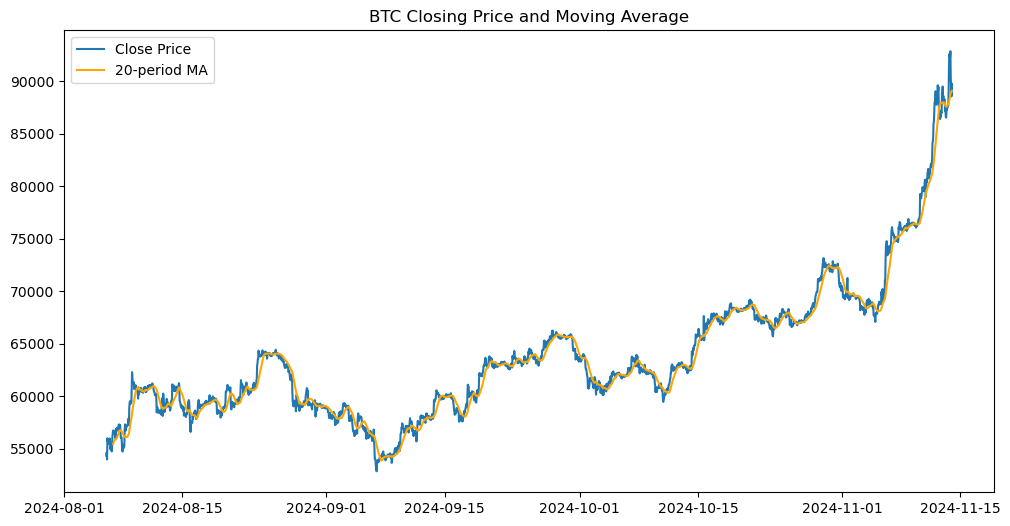

In [8]:
import matplotlib.pyplot as plt

# Plot closing price and MA20
plt.figure(figsize=(12, 6))
plt.plot(btc_data.index, btc_data['<CLOSE>'], label='Close Price')
plt.plot(btc_data.index, btc_data['MA20'], label='20-period MA', color='orange')
plt.legend()
plt.title('BTC Closing Price and Moving Average')
plt.show()


Feature engineering

In [9]:
import numpy as np
# Add log returns
btc_data['Log_Returns'] = (btc_data['<CLOSE>'] / btc_data['<CLOSE>'].shift(1)).apply(lambda x: np.log(x))


In [10]:
# Save the cleaned data
btc_data.to_csv('BTCUSD_H1_cleaned.csv')


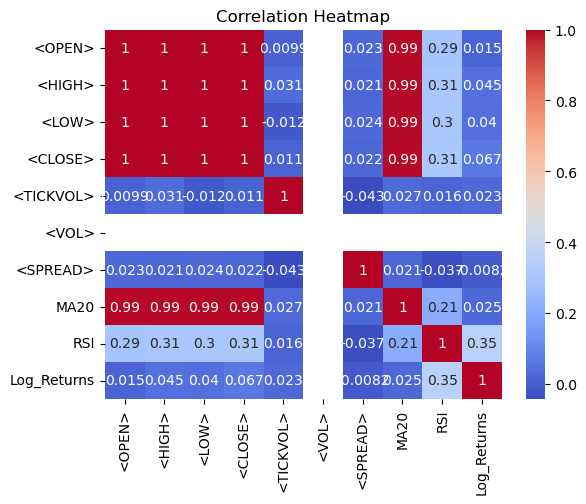

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
sns.heatmap(btc_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Model Development

In [12]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = btc_data.drop(columns=['<CLOSE>'])
y = btc_data['<CLOSE>']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Backting and strategy develo ment

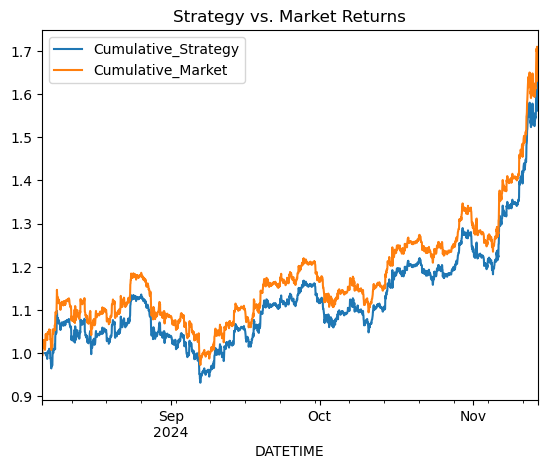

In [13]:
# Simple Moving Average Crossover Strategy
btc_data['Signal'] = (btc_data['MA20'] > btc_data['RSI']).astype(int)
btc_data['Returns'] = btc_data['<CLOSE>'].pct_change()
btc_data['Strategy_Returns'] = btc_data['Signal'].shift(1) * btc_data['Returns']

# Plot cumulative returns
btc_data['Cumulative_Strategy'] = (1 + btc_data['Strategy_Returns']).cumprod()
btc_data['Cumulative_Market'] = (1 + btc_data['Returns']).cumprod()

btc_data[['Cumulative_Strategy', 'Cumulative_Market']].plot(title='Strategy vs. Market Returns')
plt.show()


Developing the strategy

In [14]:
# Calculate short-term and long-term moving averages
btc_data['MA20'] = btc_data['<CLOSE>'].rolling(window=20).mean()
btc_data['MA50'] = btc_data['<CLOSE>'].rolling(window=50).mean()

# Generate signals: 1 for Buy, -1 for Sell
btc_data['Signal'] = 0
btc_data.loc[btc_data['MA20'] > btc_data['MA50'], 'Signal'] = 1
btc_data.loc[btc_data['MA20'] < btc_data['MA50'], 'Signal'] = -1

# Shift signal to avoid look-ahead bias
btc_data['Signal'] = btc_data['Signal'].shift(1)


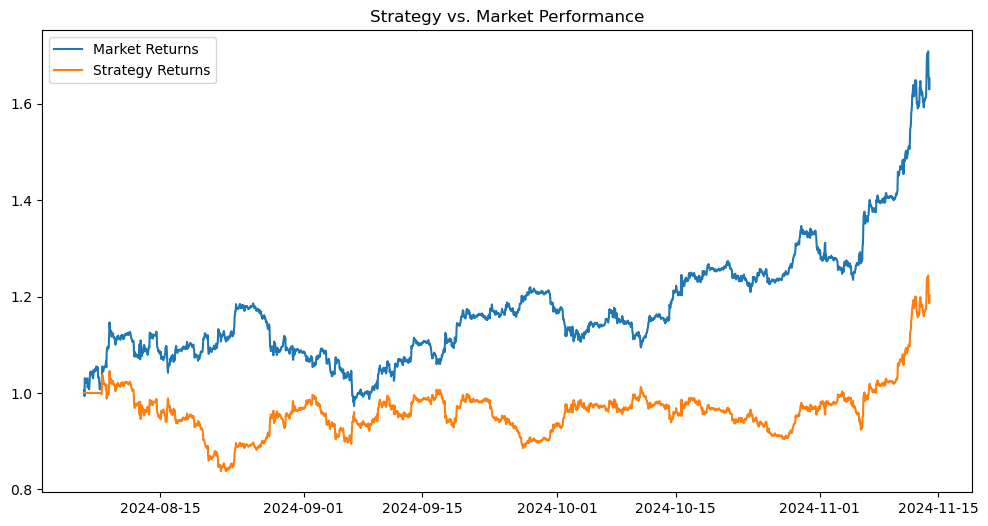

In [15]:
# Calculate returns
btc_data['Returns'] = btc_data['<CLOSE>'].pct_change()
btc_data['Strategy_Returns'] = btc_data['Signal'] * btc_data['Returns']

# Calculate cumulative returns
btc_data['Cumulative_Market'] = (1 + btc_data['Returns']).cumprod()
btc_data['Cumulative_Strategy'] = (1 + btc_data['Strategy_Returns']).cumprod()

# Plot performance
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(btc_data['Cumulative_Market'], label='Market Returns')
plt.plot(btc_data['Cumulative_Strategy'], label='Strategy Returns')
plt.title('Strategy vs. Market Performance')
plt.legend()
plt.show()


Build the model

In [16]:
# Add RSI
from ta.momentum import RSIIndicator

btc_data['RSI'] = RSIIndicator(btc_data['<CLOSE>'], window=14).rsi()

# Add MACD
from ta.trend import MACD

macd = MACD(btc_data['<CLOSE>'])
btc_data['MACD'] = macd.macd()
btc_data['MACD_Signal'] = macd.macd_signal()

# Target variable: 1 if next period's close > current close
btc_data['Target'] = (btc_data['<CLOSE>'].shift(-1) > btc_data['<CLOSE>']).astype(int)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features and target
features = ['MA20', 'MA50', 'RSI', 'MACD', 'MACD_Signal']
X = btc_data.dropna()[features]
y = btc_data.dropna()['Target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5222929936305732
              precision    recall  f1-score   support

           0       0.49      0.53      0.51       222
           1       0.55      0.51      0.53       249

    accuracy                           0.52       471
   macro avg       0.52      0.52      0.52       471
weighted avg       0.52      0.52      0.52       471



Deploy the model

In [18]:
import joblib

# Save the model
joblib.dump(model, 'btc_trading_model.pkl')


['btc_trading_model.pkl']

In [ ]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd

# Load the model
model = joblib.load('btc_trading_model.pkl')

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    df = pd.DataFrame(data)
    prediction = model.predict(df)
    return jsonify(prediction.tolist())

app.run(port=5000)
